In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/bakery-sales/Bakery Sales.csv
/kaggle/input/bakery-sales/Bakery price.csv


Objective - Increase revenue and improve product category performance

Calculate the percentage of revenue for the top 3 product categories, and aim to increase the percentage of revenue for the lowest of the top 3 categories by 5% 

In [73]:
df = pd.read_csv('../input/bakery-sales/Bakery Sales.csv')
print(df.head(5))
dfp = pd.read_csv('/kaggle/input/bakery-sales/Bakery price.csv')
dfp.head()

           datetime day of week    total place  angbutter  plain bread  jam  \
0  2019-07-11 15:35        Thur  23800.0   NaN        1.0          NaN  NaN   
1  2019-07-11 16:10        Thur  15800.0   NaN        1.0          NaN  NaN   
2  2019-07-12 11:49         Fri  58000.0   NaN        NaN          NaN  NaN   
3  2019-07-13 13:19         Sat  14800.0   NaN        1.0          1.0  NaN   
4  2019-07-13 13:22         Sat  15600.0   NaN        2.0          NaN  NaN   

   americano  croissant  caffe latte  ...  gateau chocolat  pandoro  \
0        1.0        NaN          NaN  ...              NaN      NaN   
1        NaN        NaN          NaN  ...              NaN      NaN   
2        NaN        NaN          NaN  ...              NaN      NaN   
3        NaN        NaN          NaN  ...              NaN      NaN   
4        NaN        NaN          NaN  ...              NaN      NaN   

   cheese cake  lemon ade  orange pound  wiener  vanila latte  berry ade  \
0          NaN        

,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

In [75]:
df.nunique().to_frame(name='# of Unique')

,# of Unique
datetime,2361
day of week,7
total,257
place,19
angbutter,11
plain bread,5
jam,4
americano,5
croissant,7
caffe latte,3


In [76]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
datetime,"[2019-07-11 15:35, 2019-07-11 16:10, 2019-07-1..."
day of week,"[Thur, Fri, Sat, Sun, Mon, Wed, Tues, nan]"
total,"[23800.0, 15800.0, 58000.0, 14800.0, 15600.0, ..."
place,"[nan, 효자 3동, 후평 1동, 후평 2동, 석사동, 소양동, 퇴계동, 동면, ..."
angbutter,"[1.0, nan, 2.0, 3.0, 5.0, 4.0, 6.0, 9.0, 11.0,..."
plain bread,"[nan, 1.0, 2.0, 3.0, 5.0, 4.0]"
jam,"[nan, 1.0, 2.0, 3.0, 5.0]"
americano,"[1.0, nan, 3.0, 2.0, 4.0, 5.0]"
croissant,"[nan, 1.0, 16.0, 3.0, 2.0, 6.0, 5.0, 4.0]"
caffe latte,"[nan, 1.0, 2.0, 3.0]"


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total,2420.0,21172.520661,26997.269798,12800.0,15800.0,18500.0,23000.0,1293000.0
angbutter,1973.0,1.636594,1.115636,1.0,1.0,1.0,2.0,11.0
plain bread,857.0,1.199533,0.510268,1.0,1.0,1.0,1.0,5.0
jam,220.0,1.131818,0.433617,1.0,1.0,1.0,1.0,5.0
americano,412.0,1.245146,0.527216,1.0,1.0,1.0,1.0,5.0
croissant,747.0,1.404284,1.027704,1.0,1.0,1.0,2.0,16.0
caffe latte,193.0,1.108808,0.373016,1.0,1.0,1.0,1.0,3.0
tiramisu croissant,779.0,1.213094,0.797350,1.0,1.0,1.0,1.0,14.0
cacao deep,323.0,1.126935,0.393249,1.0,1.0,1.0,1.0,4.0
pain au chocolat,587.0,1.236797,0.601598,1.0,1.0,1.0,1.0,6.0


In [78]:
df.describe(include='O')

,datetime,day of week,place
count,2421,2420,2166
unique,2361,7,19
top,2019-11-09 11:36,Sun,동면
freq,9,554,416


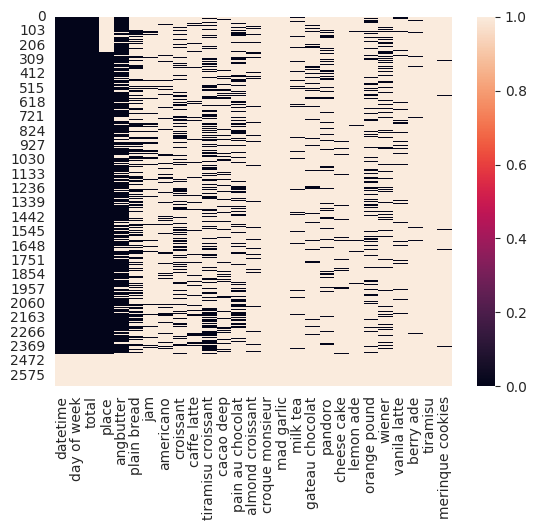

In [79]:
sns.heatmap(df.isnull())
plt.show()

In [80]:

# Drop rows where 'datetime' column has NaN values
df.dropna(subset=['datetime'], inplace=True)
df.isnull().sum()

datetime                 0
day of week              1
total                    1
place                  255
angbutter              448
plain bread           1564
jam                   2201
americano             2009
croissant             1674
caffe latte           2228
tiramisu croissant    1642
cacao deep            2098
pain au chocolat      1834
almond croissant      2219
croque monsieur       2421
mad garlic            2421
milk tea              2284
gateau chocolat       2225
pandoro               2078
cheese cake           2331
lemon ade             2386
orange pound          1902
wiener                2066
vanila latte          2212
berry ade             2367
tiramisu              2414
merinque cookies      2374
dtype: int64

# Data Cleaning

Fillina NaN Vals

In [81]:
df['place'].fillna('unknown', inplace=True)
df['total'].fillna('0',inplace=True)
product_columns = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade', 'tiramisu', 'merinque cookies', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur', 'mad garlic', 'milk tea']
df[product_columns] = df[product_columns].fillna(0)
df['datetime'] = pd.to_datetime(df['datetime'])

In [82]:
df.isnull().sum()

datetime              0
day of week           1
total                 0
place                 0
angbutter             0
plain bread           0
jam                   0
americano             0
croissant             0
caffe latte           0
tiramisu croissant    0
cacao deep            0
pain au chocolat      0
almond croissant      0
croque monsieur       0
mad garlic            0
milk tea              0
gateau chocolat       0
pandoro               0
cheese cake           0
lemon ade             0
orange pound          0
wiener                0
vanila latte          0
berry ade             0
tiramisu              0
merinque cookies      0
dtype: int64

In [83]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
datetime,2361
day of week,7
total,258
place,20
angbutter,12
plain bread,6
jam,5
americano,6
croissant,8
caffe latte,4


In [84]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
datetime,"[2019-07-11T15:35:00.000000000, 2019-07-11T16:..."
day of week,"[Thur, Fri, Sat, Sun, Mon, Wed, Tues, nan]"
total,"[23800.0, 15800.0, 58000.0, 14800.0, 15600.0, ..."
place,"[unknown, 효자 3동, 후평 1동, 후평 2동, 석사동, 소양동, 퇴계동, ..."
angbutter,"[1.0, 0.0, 2.0, 3.0, 5.0, 4.0, 6.0, 9.0, 11.0,..."
plain bread,"[0.0, 1.0, 2.0, 3.0, 5.0, 4.0]"
jam,"[0.0, 1.0, 2.0, 3.0, 5.0]"
americano,"[1.0, 0.0, 3.0, 2.0, 4.0, 5.0]"
croissant,"[0.0, 1.0, 16.0, 3.0, 2.0, 6.0, 5.0, 4.0]"
caffe latte,"[0.0, 1.0, 2.0, 3.0]"


In [85]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df["month"].unique()
print(df['month'])

0       7
1       7
2       7
3       7
4       7
       ..
2416    5
2417    5
2418    5
2419    5
2653    6
Name: month, Length: 2421, dtype: int32


In [86]:
print(df['month'])

0       7
1       7
2       7
3       7
4       7
       ..
2416    5
2417    5
2418    5
2419    5
2653    6
Name: month, Length: 2421, dtype: int32


In [87]:
df['year'] = df['year'].replace({pd.NA: 0})
df

df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert to numeric if needed

# Group by year and month
df['total'] = pd.to_numeric(df['total'], errors='coerce')
month_order = list(range(1, 13))
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
revenue_by_month = df.groupby(['year', 'month'])['total'].sum().reset_index()
revenue_by_month.set_index(['year', 'month'], inplace=True)
print(df['total'].describe())
print(df['total'].sum())
print(df['month'])


count    2.421000e+03
mean     2.116378e+04
std      2.699512e+04
min      0.000000e+00
25%      1.580000e+04
50%      1.850000e+04
75%      2.300000e+04
max      1.293000e+06
Name: total, dtype: float64
51237500.0
0       7
1       7
2       7
3       7
4       7
       ..
2416    5
2417    5
2418    5
2419    5
2653    6
Name: month, Length: 2421, dtype: category
Categories (12, int64): [1 < 2 < 3 < 4 ... 9 < 10 < 11 < 12]


In [88]:
print(f'This dataset contains the months {df["month"].unique()} for 2022')
print(f'The earliest date is {df["datetime"].min()}')
print(f'The latest date is {df["datetime"].max()}')
print(df.head())
print(revenue_by_month)

# Ensure the DataFrame contains the necessary columns
print(revenue_by_month.columns)
print()

This dataset contains the months [7, 8, 9, 10, 11, ..., 2, 3, 4, 5, 6]
Length: 12
Categories (12, int64): [1 < 2 < 3 < 4 ... 9 < 10 < 11 < 12] for 2022
The earliest date is 2019-07-11 15:35:00
The latest date is 2020-06-18 14:52:00
             datetime day of week    total    place  angbutter  plain bread  \
0 2019-07-11 15:35:00        Thur  23800.0  unknown        1.0          0.0   
1 2019-07-11 16:10:00        Thur  15800.0  unknown        1.0          0.0   
2 2019-07-12 11:49:00         Fri  58000.0  unknown        0.0          0.0   
3 2019-07-13 13:19:00         Sat  14800.0  unknown        1.0          1.0   
4 2019-07-13 13:22:00         Sat  15600.0  unknown        2.0          0.0   

   jam  americano  croissant  caffe latte  ...  cheese cake  lemon ade  \
0  0.0        1.0        0.0          0.0  ...          0.0        0.0   
1  0.0        0.0        0.0          0.0  ...          0.0        0.0   
2  0.0        0.0        0.0          0.0  ...          0.0        0.0 

In [89]:
def calculate_percent_decrease(current, previous):
    if previous == 0:
        return float('inf')  # To avoid division by zero error
    return (previous - current) / previous * 100


percent_decrease_jul_to_aug_2019 = calculate_percent_decrease(
    revenue_by_month.loc[(2019, 8), 'total'], revenue_by_month.loc[(2019, 7), 'total']
)
percent_decrease_may_to_jun_2020 = calculate_percent_decrease(
    revenue_by_month.loc[(2020, 6), 'total'], revenue_by_month.loc[(2020, 5), 'total']
)
print(f"Percentage decrease from July to August 2019: {percent_decrease_jul_to_aug_2019:.2f}%")
print(f"Percentage decrease from May to June 2020: {percent_decrease_may_to_jun_2020:.2f}%")

items_columns = df.columns[4:24]
df[items_columns] = df[items_columns].fillna(0)

df[items_columns] = df[items_columns].apply(pd.to_numeric, errors='coerce')
items_sum = df[items_columns].sum()

sorted_items = items_sum.sort_values(ascending=False)
top_15 = sorted_items.head(15)
print(top_15)

place_item_counts = df.groupby('place')[items_columns].sum()
popular_items_by_place = place_item_counts.idxmax(axis=1)
# Combine results into a DataFrame
popular_items_df = pd.DataFrame({
    'place': popular_items_by_place.index,
    'most_popular_item': popular_items_by_place.values
})

print("\nMost Popular Items by Place:")
print(popular_items_df)

Percentage decrease from July to August 2019: -49.65%
Percentage decrease from May to June 2020: 100.00%
angbutter             3229.0
croissant             1049.0
plain bread           1028.0
tiramisu croissant     945.0
pain au chocolat       726.0
orange pound           566.0
americano              513.0
wiener                 476.0
pandoro                394.0
cacao deep             364.0
jam                    249.0
vanila latte           241.0
almond croissant       235.0
caffe latte            214.0
gateau chocolat        210.0
dtype: float64

Most Popular Items by Place:
      place most_popular_item
0   unknown         angbutter
1       강남동         croissant
2        교동         angbutter
3       교동          angbutter
4       근화동         angbutter
5       동내면         angbutter
6        동면         angbutter
7       석사동         angbutter
8       소양동         angbutter
9       신동면         angbutter
10     신사우동         angbutter
11     약사명동         angbutter
12      조운동         angbu

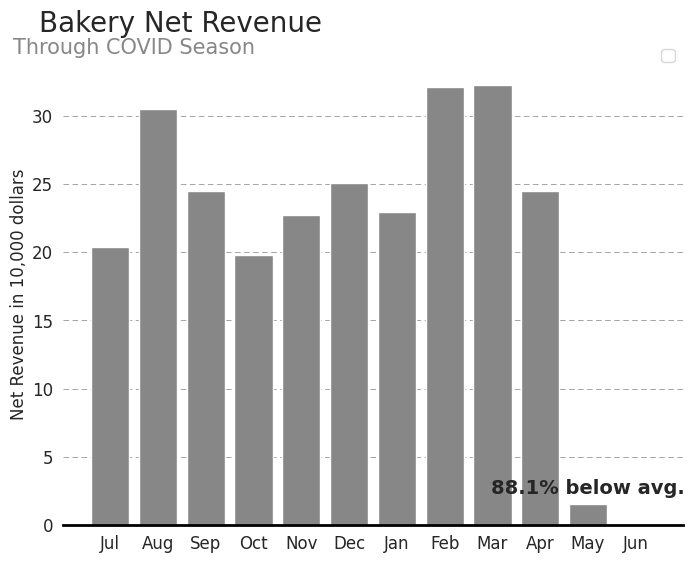

In [90]:
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
# Group the data by month and calculate the total sales revenue
monthly_sales = df.groupby(pd.Grouper(key='datetime', freq='M')).agg({'total': 'sum'})
# Get latest month revenue and average quarterly revenue

latest_month_revenue = monthly_sales.tail(1).iloc[0][0]
avg_quarterly_revenue = monthly_sales.tail(3).head(2).mean()[0]

# Compute percentage below average revenue for month
pct_below_avg = round((1 - (latest_month_revenue / avg_quarterly_revenue)) * 100, 1)

# Plot the monthly sales revenue
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(monthly_sales.index.strftime('%b'), monthly_sales['total'], color='#878787')

# Add label above each bar with the percentage below the average revenue for the quarter
for i, bar in enumerate(bars):
    if i == len(bars) - 1 or i < len(bars) - 2:
        continue
    month_sales = monthly_sales.iloc[i]['total']
    pct_below_avg = round((1 - (month_sales / avg_quarterly_revenue)) * 100, 1)
    ax.annotate(f'{pct_below_avg}% below avg.', 
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()-7000), 
                xytext=(0, 5), textcoords='offset points',  fontweight='bold', 
                ha='center', va='bottom', fontsize=14)
plt.legend(bbox_to_anchor=(1,1.05), fontsize=12, fancybox=True)

ax.set_title('Bakery Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Through COVID Season', fontsize=15, color='#878787', transform=ax.transAxes)
ax.set_xlabel(None)
ax.set_yticklabels(list(range(0,41,5)))
ax.set_ylabel('Net Revenue in 10,000 dollars', fontsize=12, labelpad=3)

ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)

ax.tick_params(axis='both', labelsize=12)
# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
plt.show()


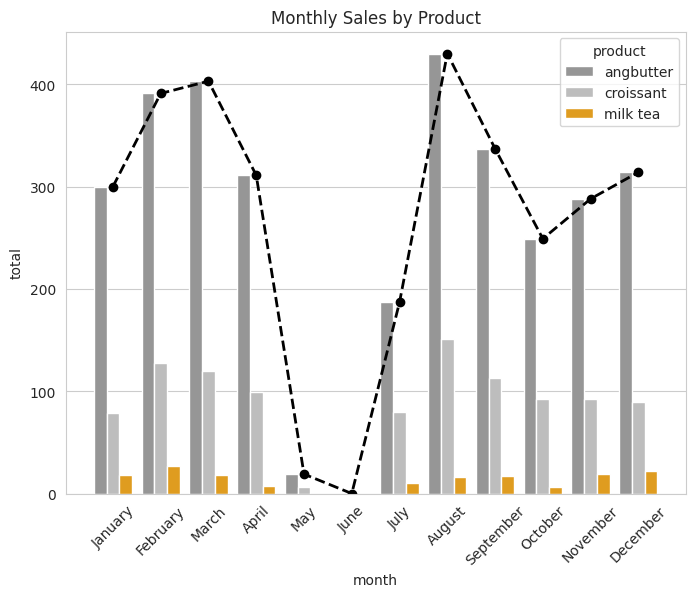

In [91]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

fig, ax = plt.subplots(figsize=(8, 6))

# Choose desired items
desired_items = ['angbutter', 'croissant', 'milk tea']
sales_data = df[df[desired_items].notna().any(axis=1)]

sales_data['datetime'] = pd.to_datetime(sales_data['datetime'])
sales_data['month'] = sales_data['datetime'].dt.month_name()

# Aggregate sales data by month and product
sales_by_month = sales_data.groupby(['month'])[desired_items].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert month to categorical
sales_by_month['month'] = pd.Categorical(sales_by_month['month'], categories=month_order, ordered=True)

# Sort by month to ensure the correct order
sales_by_month = sales_by_month.sort_values('month')

# Melt the DataFrame to long format for seaborn
sales_by_month_melted = sales_by_month.melt(id_vars='month', value_vars=desired_items, var_name='product', value_name='total')

# Create the bar plot
ax = sns.barplot(x='month', y='total', hue='product', data=sales_by_month_melted, palette=['#969696', '#bdbdbd', 'orange'])

# Extract the sales data for 'angbutter'
sales_angbutter = sales_by_month_melted[sales_by_month_melted['product'] == 'angbutter'].reset_index(drop=True)
sales_angbutter['month'] = pd.Categorical(sales_angbutter['month'], categories=month_order, ordered=True)
sales_angbutter.sort_values(by='month', inplace=True)
# Add line plot for total monthly revenue of Angbutter
x_values = range(len(month_order))

ax.plot(x_values, sales_angbutter['total'], color='black', linestyle='--', linewidth=2, marker='o')


plt.xticks(rotation=45)
plt.title('Monthly Sales by Product')
plt.show()



In [113]:
df['day of week'] = df['day of week'].astype('category')
items_columns = df.select_dtypes(include=[np.number]).columns.tolist()
items_columns = [col for col in items_columns if col not in ['datetime', 'place', 'total']]

# Fill NaN values with 0 and convert to numeric
df[items_columns] = df[items_columns].fillna(0).apply(pd.to_numeric, errors='coerce')

df['day of week'] = df['day of week'].astype('category')

place_item_counts = df.groupby('place')[items_columns].sum()

top_n = 5

top_items_by_place = place_item_counts.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)
top_items_df = pd.DataFrame(top_items_by_place.tolist(), index=place_item_counts.index, columns=[f'top_item_{i+1}' for i in range(top_n)])
print("Top Items by Place:")
print(top_items_df)
print(top_items_df.columns)

Top Items by Place:
        top_item_1 top_item_2          top_item_3          top_item_4  \
place                                                                   
unknown       year  angbutter           croissant    pain au chocolat   
강남동           year  croissant           angbutter    pain au chocolat   
교동            year  angbutter  tiramisu croissant           americano   
교동            year  angbutter    pain au chocolat           croissant   
근화동           year  angbutter           croissant    pain au chocolat   
동내면           year  angbutter  tiramisu croissant         plain bread   
동면            year  angbutter         plain bread           croissant   
석사동           year  angbutter  tiramisu croissant         plain bread   
소양동           year  angbutter         plain bread           croissant   
신동면           year  angbutter              wiener           croissant   
신사우동          year  angbutter  tiramisu croissant         plain bread   
약사명동          year  angbutter  

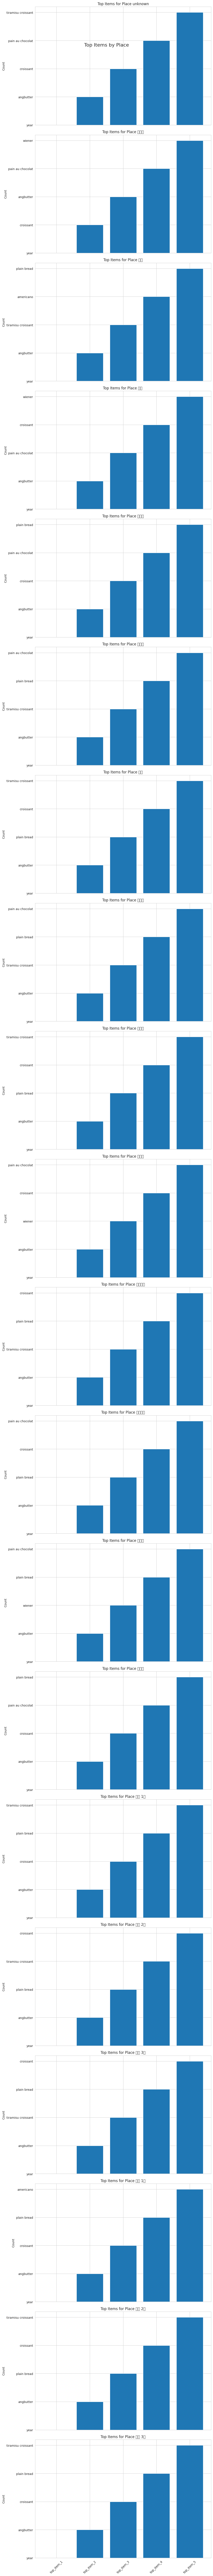

In [114]:
def plot_top_items(df):
    num_places = len(df)
    num_top_items = df.shape[1]  # Number of top items columns

    fig, axs = plt.subplots(num_places, 1, figsize=(10, 6*num_places), sharex=True)
    fig.suptitle('Top Items by Place', fontsize=16)

    for i, (place, row) in enumerate(df.iterrows()):
        top_items = row.tolist()  # Convert row to list of top items

        axs[i].bar(range(len(top_items)), top_items, tick_label=df.columns)
        axs[i].set_title(f'Top Items for Place {place}')
        axs[i].set_ylabel('Count')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming top_items_df is your DataFrame with places as rows and top items as columns
# Example usage:
plot_top_items(top_items_df)